In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd


## Black-Scholes equation

In [13]:

# T = 1 for 1 year maturity
# c: call option price
# p: put option pricee
def BS_european_price(S0, K, T, r, sigma):

    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    c = norm.cdf(d1) * S0 - norm.cdf(d2) * K * np.exp(-r * T)
    p = norm.cdf(-d2) * K * np.exp(-r * T) - norm.cdf(-d1) * S0

    return c, p


## Geometric Brownian Motion (GBM)

In [4]:
# a = np.array([[0.01, 0.005, 0.002], [1,2,3], [4,5,6]])
# b = np.array([[10,11,12]])

# np.cumsum(np.concatenate((a,b), axis=0), axis=0)
# [[S0] * numPaths]
# dT = T / numSteps

#     #each step's movement
#     #delta: numSteps * numPaths
# delta = mu * dT + sigma * np.sqrt(dT) * np.random.normal(0,1, (numSteps, numPaths))
# delta
# s=np.exp((mu - 0.5 * sigma ** 2) * dT + sigma * np.sqrt(dT) * np.random.normal(0,1, (numSteps, numPaths)))
# s[len(s)-1].shape

In [14]:
def GRWPaths(S0, K, T, r, mu, sigma, numSteps, numPaths):
    paths = np.zeros((numSteps+1, numPaths))
    dT = T / numSteps

    #each step's movement
    #delta: numSteps * numPaths
    #delta = np.exp((mu - 0.5*sigma**2)) * dT + sigma * np.sqrt(dT) * np.random.normal(0,1, (numSteps, numPaths))
    delta = np.exp((mu - 0.5 * sigma ** 2) * dT + sigma * np.sqrt(dT) * np.random.normal(0,1, (numSteps, numPaths)))
    paths = np.cumprod(np.concatenate(([[S0] * numPaths],delta), axis=0), axis=0)
    return paths


In [15]:
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    s = GRWPaths(S0, K, T, r, mu, sigma, numSteps, numPaths)

    #calculate average across numPaths then discount future value to present value
    c = np.mean(np.maximum(s[len(s)-1]-K,0)) * np.exp(-r*T)
    p = np.mean(np.maximum(K-s[len(s)-1],0)) * np.exp(-r*T)
    return c, p


def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
    s = GRWPaths(S0, K, T, r, mu, sigma, numSteps, numPaths)
    knock_in = np.any(s  > Sb, axis = 0)

    call_payoff = np.maximum(s[len(s)-1]-K,0)
    put_payoff = np.maximum(K-s[len(s)-1],0)

    c = np.mean(np.where(knock_in, call_payoff, 0)) * np.exp(-r*T)
    p = np.mean(np.where(knock_in, put_payoff, 0)) * np.exp(-r*T)

    return c, p
#MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

In [18]:
# # Complete the following functions
# def BS_european_price(S0, K, T, r, sigma):
#   # --------- Insert your code here --------- #
#   return c, p

# def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
#   # --------- Insert your code here --------- #
#   return c, p

# def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
#   # --------- Insert your code here --------- #
#   return c, p


# Pricing a European option using Black-Scholes formula and Monte Carlo simulations
# Pricing a Barrier option using Monte Carlo simulations
S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 10;
numPaths = 1000000;

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step = MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step = MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# # Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# # Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step))
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step))
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step))
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step))
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step))
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step))
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step))
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

# Plot results
# --------- Insert your code here --------- #

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.033377607552046
One-step MC price of an European put option is 7.898817657222702
Multi-step MC price of an European call option is 8.020499120477375
Multi-step MC price of an European put option is 7.903030234256964
One-step MC price of an Barrier call option is 7.793726511954623
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.949122867523895
Multi-step MC price of an Barrier put option is 1.200745316600754


### Multi-step Plot

In [19]:
# The simulated path
s_multi = GRWPaths(S0, K, T, r, mu, sigma, numSteps, numPaths)
s_single = GRWPaths(S0, K, T, r, mu, sigma, 1, numPaths)

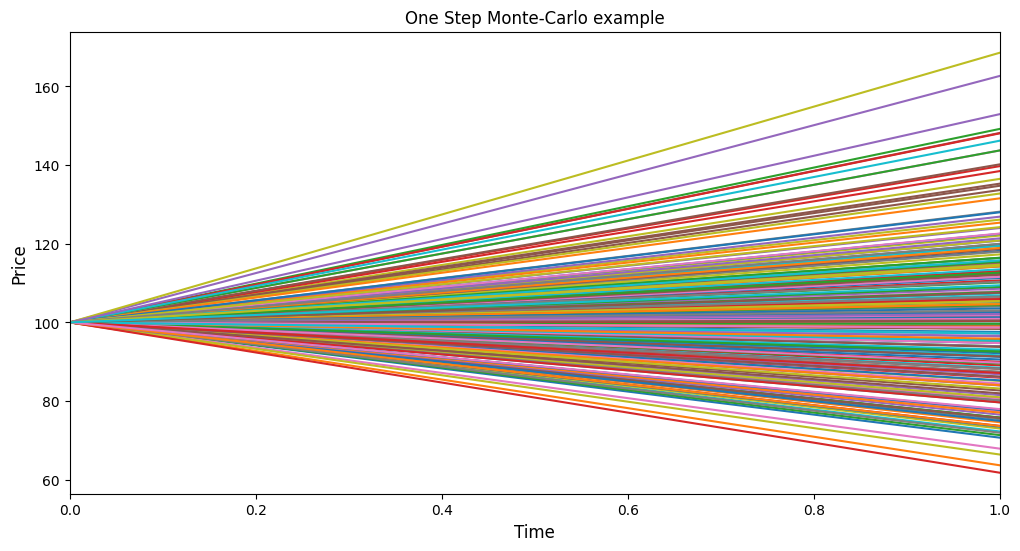

In [20]:
plt.figure(figsize=(12,6))
plt.plot(s_single[:,:200])
plt.xlim([0, 1])
plt.title("One Step Monte-Carlo example")
plt.ylabel("Price", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.show()

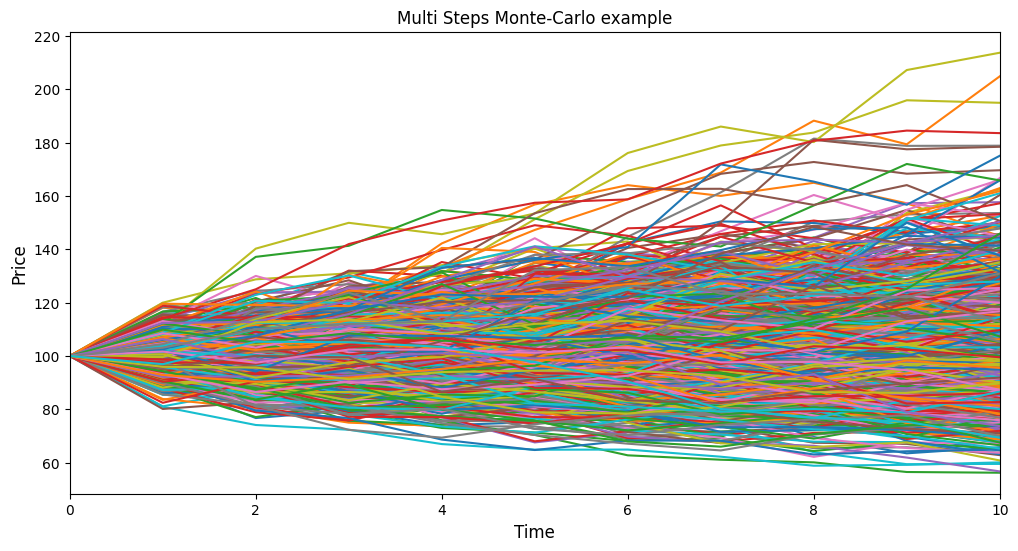

In [21]:
plt.figure(figsize=(12,6))
plt.plot(s_multi[:,:1000])
plt.xlim([0, numSteps])
plt.title("Multi Steps Monte-Carlo example")
plt.ylabel("Price", fontsize=12)
plt.xlabel("Time", fontsize=12)
plt.show()

### Compute prices of Barrier options with volatility increased and decreased by 10% from the original inputs.

In [22]:
sigma = 0.2  # volatility

# increase by 10%
callMC_Barrier_Knockin_Price_1_step_inc, putMC_Barrier_Knockin_Price_1_step_inc = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 1, numPaths)
callMC_Barrier_Knockin_Price_multi_step_inc, putMC_Barrier_Knockin_Price_multi_step_inc = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, numSteps, numPaths)


# decrease by 10%
callMC_Barrier_Knockin_Price_1_step_dec, putMC_Barrier_Knockin_Price_1_step_dec = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 1, numPaths)
callMC_Barrier_Knockin_Price_multi_step_dec, putMC_Barrier_Knockin_Price_multi_step_dec = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, numSteps, numPaths)


print('Increase volatility by 10%:')
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step_inc))
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step_inc))
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step_inc))
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step_inc))


print('Decrease volatility by 10%:')
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step_dec))
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step_dec))
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step_dec))
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step_dec))



Increase volatility by 10%:
One-step MC price of an Barrier call option is 8.605381857748053
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 8.747058920749303
Multi-step MC price of an Barrier put option is 1.504789646231103
Decrease volatility by 10%:
One-step MC price of an Barrier call option is 6.997131424015212
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.137963829804451
Multi-step MC price of an Barrier put option is 0.9103999398036619
